# DS Phase 1 Project: Aviation Accidents 

# Business Understanding

This project aims to determine which planes would be best to look into first for indoor skydiving companies that plan to expand to offer real, outdoor skydiving. We'll use an Aviation Accident Dataset to determine which planes would be the lowest risk for the company to start looking into for their expansion. 


# Data Understanding

"Notebook clearly describes the data, including:
- Describe the data sources and explain why the data are suitable for the project
- Present the size of the dataset and descriptive statistics for all features used in the analysis
- Justify the inclusion of features based on their properties and relevance for the project
- Identify any limitations of the data that have implications for the project"


The data source used in this project is a data set from the National Transportation Safety Board with specifics about US aviation accidents between 1962 through 2023. It is in the form of a CSV file and accessed via Kaggle.

Through data cleaning and creating visualizations, this project provides recommendations about which planes would be of lowest risk. The Aviation Accident data set is a good option to use for this project as it contains many factual details of specific accidents in past flight accidents. 

It's important to note that this dataset's largest limitation is that it does not contain records of flights that occured smoothly.

The Aviation Accident dataset contains 90348 records of individual aviation accidents. There are 31 columns that break down each accident into further details.



## Data Preparation

### Import Standard Libraries & Load Dataset

"Notebook shows how and why you prepared your data, including:
- Instructions or code needed to get and prepare the raw data for analysis
- Code comments and text to explain what your data preparation code does
- Valid justifications for why the steps you took are appropriate for the problem you are solving"

In [1]:
#import standard libraries/ load dataset into dataframe
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
aviation = pd.read_csv('https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-1-project-v3/refs/heads/master/data/Aviation_Data.csv')
aviation.head()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [2]:
aviation.shape

(90348, 31)

In [3]:
aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
#note: specific accidents involving skydiving
aviation["Purpose.of.flight"].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

### Clean Dataset

In [5]:
#cleaning up columns- new dataframe aviation1
aviation1= aviation.drop(['Event.Id', 'Aircraft.damage', 'Broad.phase.of.flight', 'Engine.Type', 'FAR.Description','Publication.Date', 'Aircraft.Category', 'Amateur.Built', 'Registration.Number', 'Accident.Number', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Air.carrier', 'Schedule', 'Investigation.Type', ], axis = 1)
aviation1.head()

,Event.Date,Location,Country,Injury.Severity,Make,Model,Number.of.Engines,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,1.0,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Piper,PA24-180,1.0,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,1974-08-30,"Saltville, VA",United States,Fatal(3),Cessna,172M,1.0,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause
3,1977-06-19,"EUREKA, CA",United States,Fatal(2),Rockwell,112,1.0,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
4,1979-08-02,"Canton, OH",United States,Fatal(1),Cessna,501,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause


In [6]:
#formate date column
aviation1['Event.Date'] = pd.to_datetime(aviation['Event.Date'])

In [7]:
#split date column by year and month
aviation1['Year'] = aviation1['Event.Date'].dt.year
aviation1['Month'] = aviation1['Event.Date'].dt.month_name()

In [8]:
#Injury.Severity column has number fatalities in parentheses, we already have that information in the Total.Fatalities column
#Split at the parentheses, and call the new column Injury.Severity.Type. Lastly, remove Injury.Severity column
aviation1['Injury.Severity.Type'] = aviation1['Injury.Severity'].str.split('(').str[0]
aviation1= aviation1.drop(['Injury.Severity'], axis =1) 

In [9]:
aviation1['Injury.Severity.Type'].value_counts()

Non-Fatal      67357
Fatal          17826
Incident        2219
Minor            218
Serious          173
Unavailable       96
Name: Injury.Severity.Type, dtype: int64

In [10]:
aviation1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              88889 non-null  datetime64[ns]
 1   Location                88837 non-null  object        
 2   Country                 88663 non-null  object        
 3   Make                    88826 non-null  object        
 4   Model                   88797 non-null  object        
 5   Number.of.Engines       82805 non-null  float64       
 6   Purpose.of.flight       82697 non-null  object        
 7   Total.Fatal.Injuries    77488 non-null  float64       
 8   Total.Serious.Injuries  76379 non-null  float64       
 9   Total.Minor.Injuries    76956 non-null  float64       
 10  Total.Uninjured         82977 non-null  float64       
 11  Weather.Condition       84397 non-null  object        
 12  Report.Status           82508 non-null  object

In [11]:
aviation1['Make'].value_counts()

Cessna              22227
Piper               12029
CESSNA               4922
Beech                4330
PIPER                2841
                    ...  
Petz                    1
TERRY F KING            1
GREGG ORIGER            1
MCDANIEL JAMES D        1
Daniel La Lee           1
Name: Make, Length: 8237, dtype: int64

In [12]:
#clean up Make column
aviation1['Make'] = aviation1['Make'].str.title()
aviation1['Make'] = aviation1['Make'].replace('Dehavilland', 'De Havilland')
aviation1['Make'].value_counts()

Cessna                            27149
Piper                             14870
Beech                              5372
Boeing                             2745
Bell                               2722
                                  ...  
Thomas J Hankamp                      1
Kawasaki Heavy Industries Ltd.        1
Farrand                               1
Raymond C. Voegele                    1
Daniel La Lee                         1
Name: Make, Length: 7586, dtype: int64

In [13]:
aviation1['Model'].value_counts().head(10)

152          2367
172          1756
172N         1164
PA-28-140     932
150           829
172M          798
172P          689
182           659
180           622
150M          585
Name: Model, dtype: int64

In [14]:
#Clean up Model column- remove letter after number (i.e. 182 and 182A can be counted together)
aviation1['Model'] = aviation1['Model'].str.replace(r'[a-zA-Z]$', '', regex=True)
aviation1['Model'].value_counts().head(10)

172          6198
150          3152
182          2589
152          2385
M20          1205
180          1062
206          1030
G-164        1014
PA-28-140     953
T210          776
Name: Model, dtype: int64

In [15]:
aviation1['Country'].value_counts()

United States        82248
Brazil                 374
Canada                 359
Mexico                 358
United Kingdom         344
                     ...  
Mauritania               1
AY                       1
Wallis and Futuna        1
Gibraltar                1
Albania                  1
Name: Country, Length: 219, dtype: int64

In [16]:
#save this df to csv so we can plot accidents using majority of the original data
aviation1.to_csv('avation1.csv', index=False) 

In [17]:
#to look at accidents within the states only, create US dataframe, then drop country column and reset the index.
aviation_us= aviation1[aviation1['Country'] == 'United States']
aviation_us= aviation_us.drop(['Country'], axis =1) 
aviation_us.reset_index(drop= True, inplace=True)

In [18]:
#split location into city and state columns, remove location column
aviation_us['City'] = aviation_us['Location'].str.split(',').str[0]
aviation_us['State'] = aviation_us['Location'].str.split(',').str[1]
aviation_us= aviation_us.drop(['Location'], axis =1)

In [19]:
aviation_us['City'].value_counts().head(10)

ANCHORAGE       434
MIAMI           206
HOUSTON         202
ALBUQUERQUE     196
CHICAGO         184
FAIRBANKS       174
JACKSONVILLE    159
TUCSON          142
COLUMBUS        140
ENGLEWOOD       139
Name: City, dtype: int64

In [20]:
aviation_us['State'].value_counts().head(10)

 CA    8857
 TX    5913
 FL    5825
 AK    5672
 AZ    2834
 CO    2726
 WA    2611
 IL    2060
 MI    2030
 GA    2023
Name: State, dtype: int64

In [21]:
aviation_us.shape

(82248, 16)

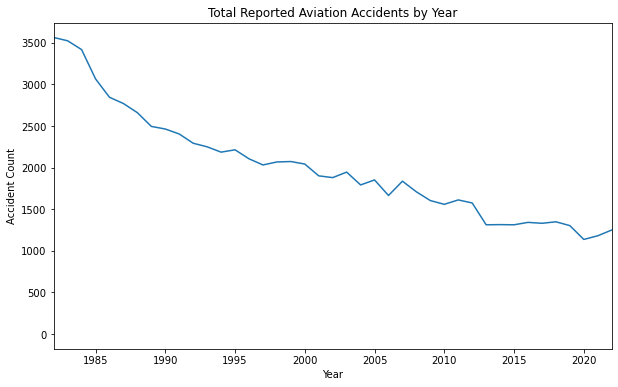

In [22]:
accidents_by_year = aviation1.groupby(aviation_us['Event.Date'].dt.year).size()
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(accidents_by_year)
ax.set_xlim(1982, aviation1['Year'].max())
ax.set_xlabel("Year")
ax.set_ylabel("Accident Count")
ax.set_title("Total Reported Aviation Accidents by Year")
plt.show()

In [23]:
#Check for % null variables by column 
aviation_us.isna().sum()/82248

Event.Date                0.000000
Make                      0.000255
Model                     0.000462
Number.of.Engines         0.022797
Purpose.of.flight         0.029533
Total.Fatal.Injuries      0.129535
Total.Serious.Injuries    0.138301
Total.Minor.Injuries      0.130447
Total.Uninjured           0.060853
Weather.Condition         0.007842
Report.Status             0.031745
Year                      0.000000
Month                     0.000000
Injury.Severity.Type      0.001313
City                      0.000134
State                     0.000134
dtype: float64

In [24]:
#finish cleaning aviation_us dataframe 
aviation_us.dropna(subset=['City'], inplace=True)
aviation_us.dropna(subset=['State'], inplace=True)
aviation_us.dropna(subset=['Injury.Severity.Type'], inplace=True)
aviation_us.dropna(subset=['Make'], inplace=True)
aviation_us.dropna(subset=['Model'], inplace=True)
aviation_us.dropna(subset=['Number.of.Engines'],inplace=True)
aviation_us.dropna(subset=['Purpose.of.flight'], inplace=True)
aviation_us.dropna(subset=['Total.Fatal.Injuries'], inplace=True)
aviation_us.dropna(subset=['Total.Serious.Injuries'], inplace=True)
aviation_us.dropna(subset=['Total.Minor.Injuries'], inplace=True)
aviation_us.dropna(subset=['Total.Uninjured'], inplace=True)
aviation_us.dropna(subset=['Weather.Condition'], inplace=True)
aviation_us.dropna(subset=['Report.Status'], inplace=True)

In [25]:
aviation_us.reset_index(drop= True, inplace= True)
aviation_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63898 entries, 0 to 63897
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              63898 non-null  datetime64[ns]
 1   Make                    63898 non-null  object        
 2   Model                   63898 non-null  object        
 3   Number.of.Engines       63898 non-null  float64       
 4   Purpose.of.flight       63898 non-null  object        
 5   Total.Fatal.Injuries    63898 non-null  float64       
 6   Total.Serious.Injuries  63898 non-null  float64       
 7   Total.Minor.Injuries    63898 non-null  float64       
 8   Total.Uninjured         63898 non-null  float64       
 9   Weather.Condition       63898 non-null  object        
 10  Report.Status           63898 non-null  object        
 11  Year                    63898 non-null  float64       
 12  Month                   63898 non-null  object

In [26]:
#save aviation_us to csv
aviation_us.to_csv('aviation_us.csv', index= False)

In [27]:
# Want to see some specifics first about accidents related to skydiving which we'll look further into with the full data set
# skydiving specific dataframe
# using the aviation1 df because while cleaning the aviation_us df, too many skydiving specific accidents were dropped
skydiving = aviation1[aviation1['Purpose.of.flight'] == 'Skydiving']
skydiving =skydiving.drop(['Purpose.of.flight'], axis= 1)

#reset the index
skydiving.reset_index(drop= True, inplace=True)

In [28]:
skydiving= skydiving[skydiving['Country'] == 'United States']
skydiving= skydiving.drop(['Country'], axis =1) 
skydiving.reset_index(drop= True, inplace=True)

skydiving['City'] = skydiving['Location'].str.split(',').str[0]
skydiving['State'] = skydiving['Location'].str.split(',').str[1]
skydiving= skydiving.drop(['Location'], axis =1)

In [29]:
skydiving.head()

,Event.Date,Make,Model,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Year,Month,Injury.Severity.Type,City,State
0,1982-07-25,Cessna,182,1.0,4.0,1.0,NaN,NaN,VMC,Probable Cause,1982.0,July,Fatal,LOUISBURG,NC
1,1982-10-17,Beech,C-45,2.0,14.0,NaN,NaN,NaN,VMC,Probable Cause,1982.0,October,Fatal,TAFT,CA
2,1983-04-02,De Havilland,DHC-6,2.0,1.0,NaN,NaN,4.0,VMC,Probable Cause,1983.0,April,Fatal,MCKINNEY,TX
3,1983-08-21,Lockheed,"LEARSTAR, L-18-56",2.0,11.0,2.0,NaN,13.0,VMC,Probable Cause,1983.0,August,Fatal,SILVANA,WA
4,1984-12-30,Cessna,182,1.0,1.0,NaN,NaN,NaN,VMC,Probable Cause,1984.0,December,Fatal,DUBLIN,VA


In [30]:
skydiving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              171 non-null    datetime64[ns]
 1   Make                    171 non-null    object        
 2   Model                   171 non-null    object        
 3   Number.of.Engines       171 non-null    float64       
 4   Total.Fatal.Injuries    141 non-null    float64       
 5   Total.Serious.Injuries  121 non-null    float64       
 6   Total.Minor.Injuries    117 non-null    float64       
 7   Total.Uninjured         135 non-null    float64       
 8   Weather.Condition       171 non-null    object        
 9   Report.Status           165 non-null    object        
 10  Year                    171 non-null    float64       
 11  Month                   171 non-null    object        
 12  Injury.Severity.Type    171 non-null    object    

In [31]:
skydiving['Make'].value_counts()

Cessna                        126
Beech                          18
De Havilland                   16
Pacific Aerospace Corp Ltd      3
Pilatus                         2
Lockheed                        2
Helio                           1
Firefly Balloons Inc            1
Boeing                          1
C A S A                         1
Name: Make, dtype: int64

In [32]:
skydiving['Model'].value_counts().head(6)

182      84
208      15
P206      7
DHC-6     5
B90       4
U206      4
Name: Model, dtype: int64

In [33]:
skydiving['Injury.Severity.Type'].value_counts()

Non-Fatal    114
Fatal         55
Serious        1
Minor          1
Name: Injury.Severity.Type, dtype: int64

In [34]:
#not sure if i want to use this yet -
# Words to search for
words = ['pilot', 'fuel', 'engine', 'engine power', 'maintenance', 'flare']

# Create a dictionary to store the counts
word_counts = {}

# Iterate over the words and count their occurrences
for word in words:
    word_counts[word] = skydiving['Report.Status'].str.contains(word).sum()

# Convert the dictionary to a dataframe
result = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])

print(result)

           Word  Count
0         pilot     56
1          fuel     21
2        engine     42
3  engine power     37
4   maintenance      4
5         flare      6


In [35]:
top_categories = skydiving['Model'].value_counts().nlargest(10).index

# Filter the DataFrame to only include the top categories
df_filtered = aviation_us[aviation_us['Model'].isin(top_categories)]

# Perform the groupby operation
grouped = df_filtered.groupby('Model').mean()

print(grouped)

           Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
Model                                                                        
182                 1.001016              0.314024                0.203760   
208                 1.011628              0.488372                0.127907   
750X                1.000000              0.000000                0.000000   
B90                 2.000000              1.058824                0.117647   
C-45                2.000000              0.259259                0.111111   
DHC-6               2.000000              0.250000                0.916667   
DHC-6-200           2.000000              0.125000                1.125000   
P206                1.063830              0.936170                0.340426   
TU206               1.000000              0.261682                0.299065   
U206                1.000000              0.568627                0.289216   

           Total.Minor.Injuries  Total.Uninjured         Year  

In [36]:
#Cessna dataframe
cessna= aviation_us[aviation_us['Make'].isin(['Cessna'])]
cessna.reset_index(drop= True, inplace=True)
cessna.head()

,Event.Date,Make,Model,Number.of.Engines,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Year,Month,Injury.Severity.Type,City,State
0,1981-08-01,Cessna,180,1.0,Personal,4.0,0.0,0.0,0.0,IMC,Probable Cause,1981.0,August,Fatal,COTTON,MN
1,1982-01-01,Cessna,140,1.0,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause,1982.0,January,Non-Fatal,PULLMAN,WA
2,1982-01-01,Cessna,401,2.0,Business,0.0,0.0,0.0,2.0,IMC,Probable Cause,1982.0,January,Non-Fatal,EAST HANOVER,NJ
3,1982-01-02,Cessna,R172,1.0,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,1982.0,January,Fatal,HEARNE,TX
4,1982-01-02,Cessna,180,1.0,Personal,3.0,0.0,0.0,0.0,VMC,Probable Cause,1982.0,January,Fatal,SKWENTA,AK


In [37]:
#Beech dataframe
beech= aviation_us[aviation_us['Make'].isin(['Beech'])]
beech.reset_index(drop= True, inplace= True)
beech.head()

,Event.Date,Make,Model,Number.of.Engines,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Year,Month,Injury.Severity.Type,City,State
0,1982-01-01,Beech,V35,1.0,Personal,0.0,0.0,0.0,1.0,VMC,Probable Cause,1982.0,January,Non-Fatal,TUSKEGEE,AL
1,1982-01-02,Beech,19,1.0,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,1982.0,January,Fatal,LITTLE ROCK,AR
2,1982-01-06,Beech,35,1.0,Personal,0.0,0.0,0.0,3.0,VMC,Probable Cause,1982.0,January,Non-Fatal,JACKSON,WY
3,1982-01-07,Beech,V35,1.0,Personal,0.0,0.0,0.0,1.0,VMC,Probable Cause,1982.0,January,Non-Fatal,WESTMINISTER,MD
4,1982-01-12,Beech,P35,1.0,Personal,0.0,1.0,0.0,1.0,IMC,Probable Cause,1982.0,January,Non-Fatal,ADDISON,TX


In [38]:
cessna = cessna[cessna['Number.of.Engines'] != 0.0]
cessna = cessna[cessna['Number.of.Engines'] != 4.0]

<ipython-input-39-6b42d0b36f71>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_cessna= cessna.groupby(['Number.of.Engines'])['Total.Fatal.Injuries', 'Total.Uninjured']


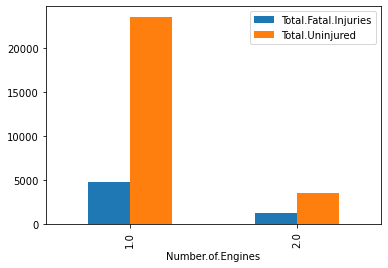

In [39]:
grouped_cessna= cessna.groupby(['Number.of.Engines'])['Total.Fatal.Injuries', 'Total.Uninjured']
agg_grouped_cessna= grouped_cessna.sum()
agg_grouped_cessna.plot(kind='bar')
plt.show()

In [40]:
beech= beech[beech['Number.of.Engines'] != 0.0]

<ipython-input-41-f049d80458e3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_beech= beech.groupby(['Number.of.Engines'])['Total.Fatal.Injuries', 'Total.Uninjured']


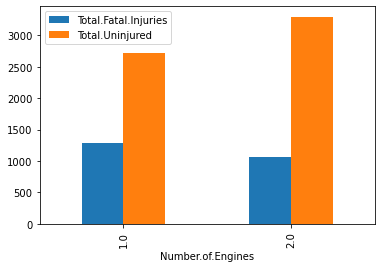

In [41]:
grouped_beech= beech.groupby(['Number.of.Engines'])['Total.Fatal.Injuries', 'Total.Uninjured']
agg_grouped_beech= grouped_beech.sum()
agg_grouped_beech.plot(kind='bar')
plt.show()

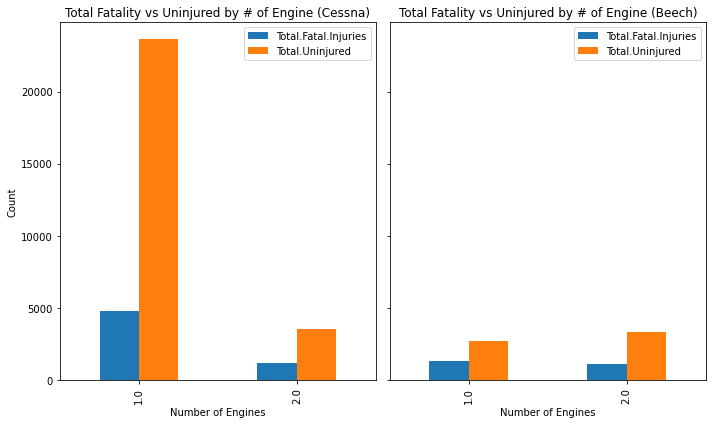

In [42]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

# Plot the first bar chart
agg_grouped_cessna.plot(kind='bar', ax=axes[0])
axes[0].set_title('Total Fatality vs Uninjured by # of Engine (Cessna)')
axes[0].set_xlabel('Number of Engines')
axes[0].set_ylabel('Count')

# Plot the second bar chart
agg_grouped_beech.plot(kind='bar', ax=axes[1])
axes[1].set_title('Total Fatality vs Uninjured by # of Engine (Beech)')
axes[1].set_xlabel('Number of Engines')
axes[1].set_ylabel('Count')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Exploratory Data Analysis

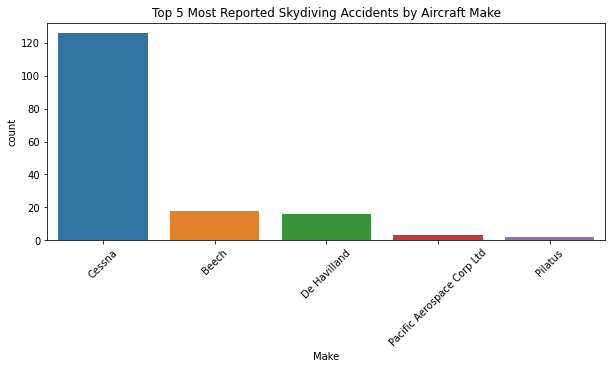

In [43]:
make_ordered = skydiving['Make'].value_counts(ascending=False).index[:5]

# Create a figure with a wider aspect ratio
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the width (10) as needed
sns.countplot(x='Make', data=skydiving, order= make_ordered)
plt.xticks(rotation=45)
ax.set_title("Top 5 Most Reported Skydiving Accidents by Aircraft Make")
plt.show()


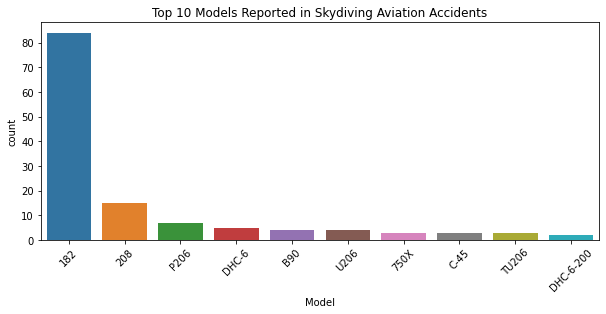

In [44]:
model_ordered = skydiving['Model'].value_counts(ascending=False).index[:10]

# Create a figure with a wider aspect ratio
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the width (10) as needed
sns.countplot(x='Model', data=skydiving, order= model_ordered)
plt.xticks(rotation=45)
ax.set_title("Top 10 Models Reported in Skydiving Aviation Accidents")
plt.show()


"Notebook promotes three recommendations for choosing films to produce:
 - Uses three or more findings from data analyses to support recommendations
 - Explains why the findings support the recommendations
 - Explains how the recommendations would help the stakeholder


"Notebook includes three relevant and polished visualizations of findings that:
 - Help the project stakeholder understand the value or success of the project
 - Have text and marks to aid reader interpretation, such as graph and axis titles, axis ticks and labels, or legend (varies by visualization type)
 - Use color, size, and/or location to appropriately facilitate comparisons
 - Are not cluttered, dense, or illegible
"

# Conclusions

## Limitations

The largest limitation of this data set is that we only have the data for accidents. We don't have the data for when flights occurred where everything went smoothly. This means we cannot say anything like: "99% of flights of a certain kind of plane has safe flights." This also makes it difficult to see the whole picture. We assume that certain Aircrafts appear more often because they are more common, not because they are inherently more dangerous.

## Recommendations

These planes are commonly used.
Of all of the reported accidents with most commonly used planes, these are the main reason for the accident.

## Next Steps

Look into price for these planes.